# Prétraitement des Images pour OCR

## Dans la partie de prétraitement, je vais effectuer les transformations suivantes :

1. Inversion de l'image
2. Binarisation
3. Suppression du bruit

## 00: Ouvrire une image

In [1]:
import cv2
from matplotlib import pyplot as plt
image_file = "data/Genova.png"
img = cv2.imread(image_file)


/home/mohamed/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:

def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

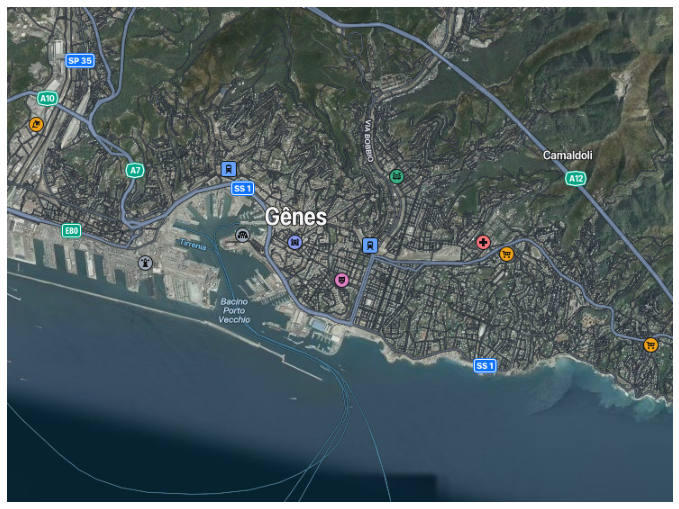

In [3]:
display(image_file)

## 01: Images Inversées

In [4]:
inverted_image = cv2.bitwise_not(img)
cv2.imwrite("temp/inverted.png", inverted_image)

True

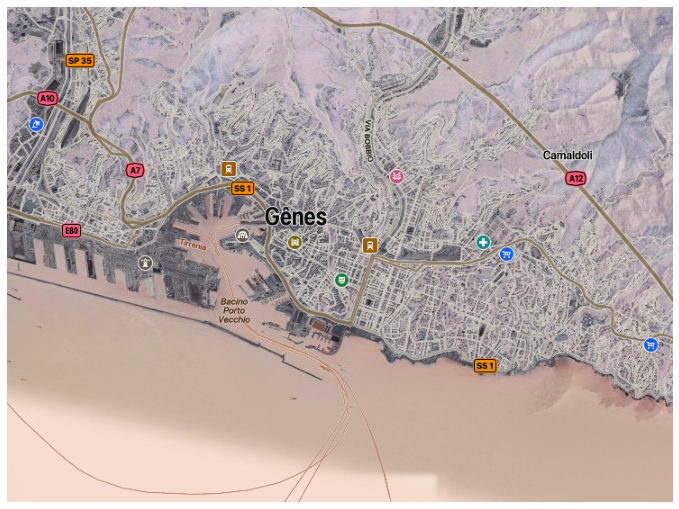

In [5]:
display("temp/inverted.png")

## 02: Binarisation

In [6]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [7]:
gray_image = grayscale(img)
cv2.imwrite("temp/gray.png", gray_image)

True

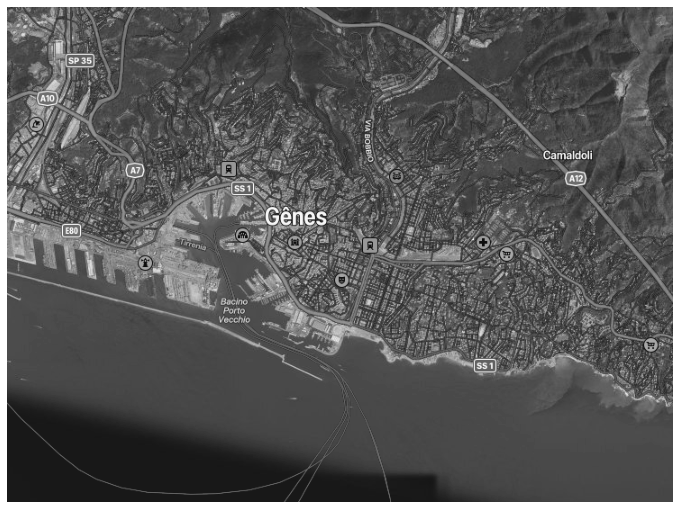

In [8]:
display("temp/gray.png")

In [9]:
thresh, im_bw = cv2.threshold(gray_image,215,150, cv2.THRESH_BINARY)
cv2.imwrite("temp/bw_image.png", im_bw)

True

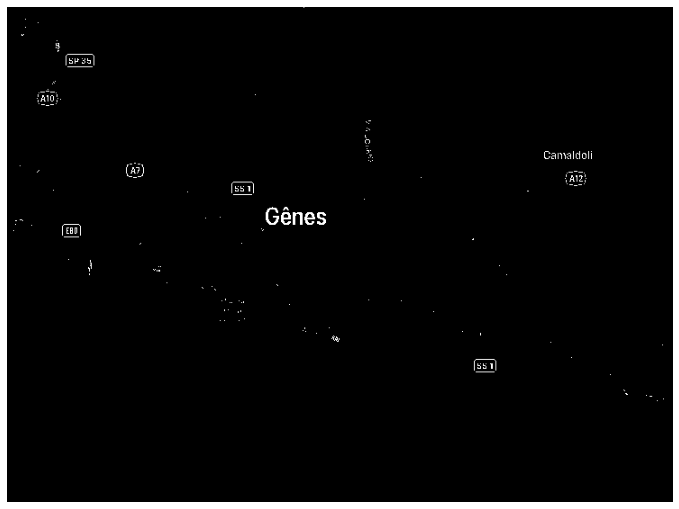

In [10]:
display("temp/bw_image.png")

## 03: Suppression du bruit

In [11]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1,1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image,1)
    return (image)

In [12]:
no_noise = noise_removal(im_bw)
cv2.imwrite("temp/no_noise.png", no_noise)

True

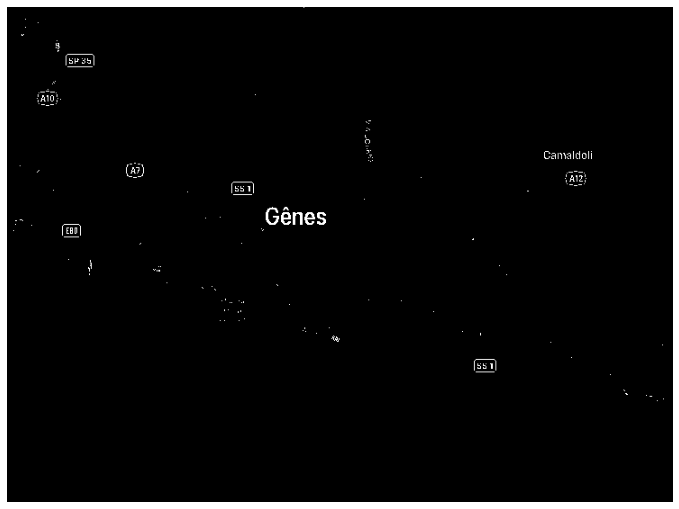

In [13]:
display("temp/no_noise.png")